In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/My Drive/datasets/linear_regression_train.csv'
data=pd.read_csv(file_path)
matrix = data.iloc[:, 1:].values

Mounted at /content/drive


0     J: 3106268.92086121 , w: [ 230.97238625   34.81491254  987.28923083 1353.74832775   19.91074522], b:2362.3227735011624
100     J: 97052.78616620382 , w: [156.79682443  31.3082016  571.37890248 738.8509003   18.71437342], b:1257.5045716267146
200     J: 76717.66274334087 , w: [149.31233991  21.1799631  555.84903889 736.74916203  12.67616573], b:1254.2853008271081
300     J: 66974.65032635609 , w: [143.68349869  14.54281913 545.56880738 735.97510474   8.82204917], b:1251.9721359118246
400     J: 62305.895460875974 , w: [139.77586182   9.95297129 538.46117353 735.45321794   6.15888951], b:1250.3693287844626
500     J: 60068.67422077014 , w: [137.07062294   6.77579213 533.54118573 735.09223003   4.31544599], b:1249.259782836669
600     J: 58996.619888974375 , w: [135.19795553   4.57643705 530.13539837 734.84234702   3.03935056], b:1248.491715150537
700     J: 58482.90203679282 , w: [133.90162838   3.05396519 527.77779118 734.66936922   2.1559919 ], b:1247.9600313446026
800     J: 582

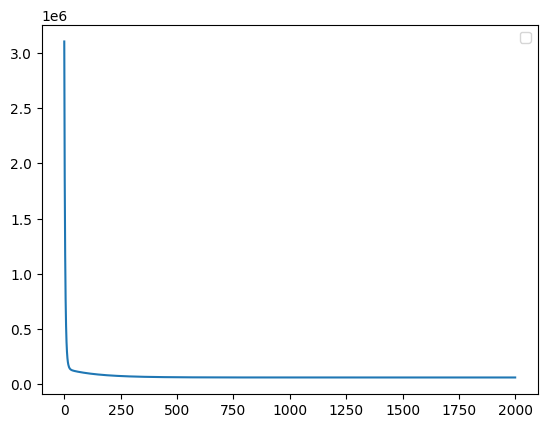

58232.085323678846


In [ ]:
import matplotlib.pyplot as plt
for r in range (25):
  matrix[:, r]= (matrix[:,r]-np.mean(matrix[:,r]))/(np.std(matrix[:,r]))

w=np.ones(25)
b=1
l=0.00001
alp=1.88
y1=np.zeros(32000)
n=2000
j=np.zeros(n)
for m in range(n):
    y1 = np.dot(matrix[:32000,:25], w)+b
    e=y1-matrix[:32000, 25]
    j[m] = (np.sum(e**2) / (2 * 32000)) + (l * np.sum(w**2))
    dj_dw = (np.dot(e, matrix[:32000, :25]) / 32000) + 2*l*w
    dj_db = np.sum(e) / 32000
    w-=alp * dj_dw
    b-=alp * dj_db

    if m%100==0:
        print(f"{m}     J: {j[m]} , w: {w[:5]}, b:{b}")
p=np.zeros(n)
for i in range(n):
   p[i]=i
plt.plot(p,j)
plt.legend()
plt.show()

y1_cv=np.dot(matrix[32000:,:25], w)+b
print(np.sum((y1_cv-matrix[32000:,25])**2)/(2*16000)+ (l*np.sum(w**2)) )

Using Linear Regression with Normalisation as well as Regularisation, we can reduce the value of J to around 58000 in both the test set as well as the cross validation set


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path1='/content/drive/My Drive/datasets/linear_regression_test.csv'
data1=pd.read_csv(file_path1)
matrix1 = data1.iloc[:, 1:].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
predictions= np.dot(matrix1[:,:25], w)+b